In [5]:
import re
import ast
import emot
import nltk
import string
import pycountry
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

In [6]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91984\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91984\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
def replace_emoji(text):
    emot_obj = emot.core.emot()
    emotes = emot_obj.emoji(text)
    for i in range(len(emotes['value'])):
        text = text.replace(emotes['value'][i], emotes['mean'][i])
    return text


def normalize(text):
    link_pattern = r"https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)"
    text = re.sub(link_pattern, '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = replace_emoji(text)
    text = text.replace('\n',' ')
    return text


In [38]:
d1 = pd.read_csv("feedback.csv", engine='python')
d1

,Data
0,Fantastic job. Clients are very happy with it....
1,I really liked the comment you made during yes...
2,I wanted to let you know that I have noticed h...
3,We have noticed how focused you are lately and...
4,We just wanted to congratulate you on hitting ...
5,I have noticed that you have been missing dead...
6,There are times when your work lacks attention...
7,Your work quality seems to vary. I believe in ...
8,I have noticed that you tend to wait for instr...
9,It appears that your time management needs som...


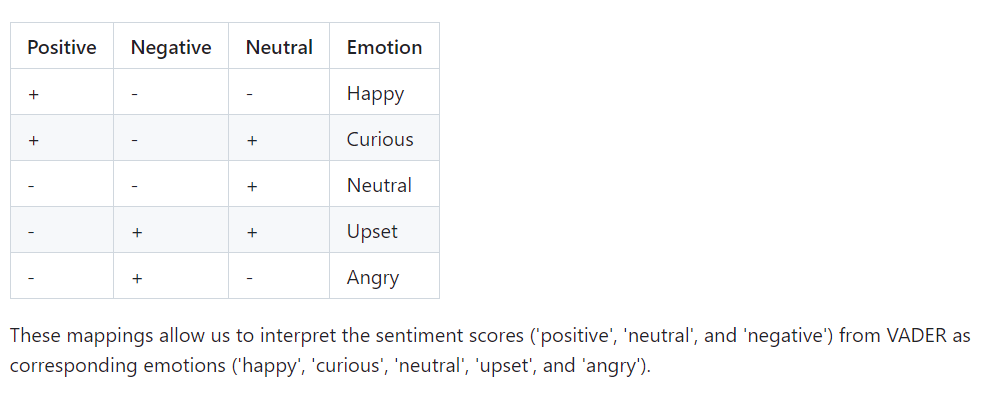

In [46]:
analyzer = SentimentIntensityAnalyzer()

# Define a dictionary to map the sentiment scores to emotions
emotion_dict = {'angry':0,
               'upset': 0,
               'netural':0,
               'curious':0,
               'happy':0}

all_scores = []
label_list = []
# Loop through each text and determine the emotion
for text in d1['Data']:
    # Get the sentiment score for the text
    text = normalize(text)
    print(f"\nNormalized text: {text}")
    sentiment_score = analyzer.polarity_scores(normalize(text))
    print(f"Sentiment_score: {sentiment_score}")

    all_scores.append(sentiment_score)
    
    senti_scores = sentiment_score.copy()
    senti_scores.pop('compound')
    
    Keymax = max(zip(senti_scores.values(), senti_scores.keys()))[1]
    print(f"Label: {Keymax}")
    
    # Appending the label into a list
    label_list.append(Keymax)
    
    # Determine the emotion based on the sentiment score
    
    if sentiment_score['neg'] > sentiment_score['pos']:
        if sentiment_score['neg'] > sentiment_score['neu']:
            emotion_dict['angry'] += 1
        else:
            emotion_dict['upset'] += 1
            
            
    elif sentiment_score['pos'] > sentiment_score['neg']:
        if sentiment_score['pos'] > sentiment_score['neu']:
            emotion_dict['happy'] += 1
        else:
            emotion_dict['curious'] += 1
            
            
    else:
        if sentiment_score['neu'] > 0.5:
            emotion_dict['netural'] += 1


Normalized text: Fantastic job. Clients are very happy with it. Congratulations!
Sentiment_score: {'neg': 0.0, 'neu': 0.337, 'pos': 0.663, 'compound': 0.915}
Label: pos

Normalized text: I really liked the comment you made during yesterday team meeting. It was a great contribution to the discussion. Your positive attitude is felt throughout the department!
Sentiment_score: {'neg': 0.0, 'neu': 0.665, 'pos': 0.335, 'compound': 0.9019}
Label: neu

Normalized text: I wanted to let you know that I have noticed how much you have developed your python. I know it can be challenging to overcome or master python but we can feel your drive to succeed.
Sentiment_score: {'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'compound': 0.6808}
Label: neu

Normalized text: We have noticed how focused you are lately and how well you manage your time. You are producing tremendous work; keep it up!
Sentiment_score: {'neg': 0.0, 'neu': 0.808, 'pos': 0.192, 'compound': 0.6114}
Label: neu

Normalized text: We just wan

In [47]:
d1['Labels'] = label_list
d1

,Data,Labels
0,Fantastic job. Clients are very happy with it....,pos
1,I really liked the comment you made during yes...,neu
2,I wanted to let you know that I have noticed h...,neu
3,We have noticed how focused you are lately and...,neu
4,We just wanted to congratulate you on hitting ...,neu
5,I have noticed that you have been missing dead...,neu
6,There are times when your work lacks attention...,neu
7,Your work quality seems to vary. I believe in ...,neu
8,I have noticed that you tend to wait for instr...,neu
9,It appears that your time management needs som...,neu


In [48]:
emotion_dict

{'angry': 1, 'upset': 0, 'netural': 1, 'curious': 8, 'happy': 1}

In [49]:
# Print the count of each emotion
for emotion, count in emotion_dict.items():
    print(f"{emotion}: {count}")

angry: 1
upset: 0
netural: 1
curious: 8
happy: 1


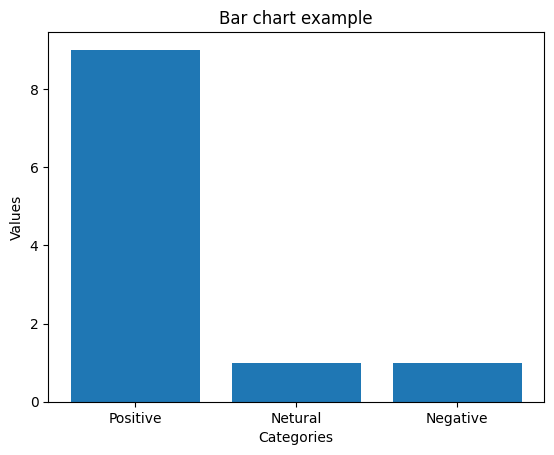

In [50]:
compound_scores = []
for tweet_scores in all_scores:
    compound_scores.append(tweet_scores['compound'])
    
scores = np.array(compound_scores)

x = np.array(['Positive', 'Netural', 'Negative'])
y = np.array([np.sum(scores > 0), np.sum(scores == 0), np.sum(scores < 0)])

# Create bar chart
plt.bar(x, y)

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar chart example')

# Show chart
plt.show()

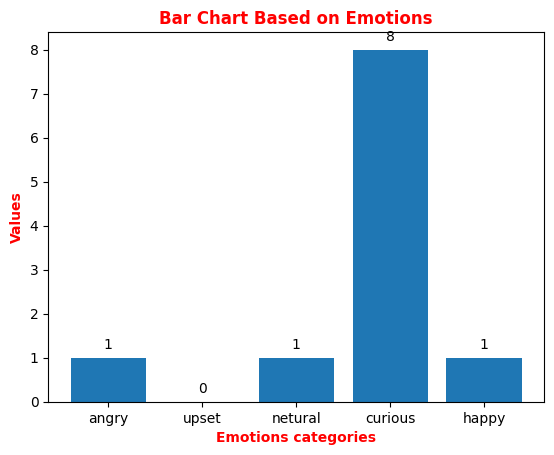

In [51]:
compound_scores = []
for tweet_scores in all_scores:
    compound_scores.append(tweet_scores['compound'])
    
scores = np.array(compound_scores)

x = np.array([emotion for emotion in emotion_dict.keys()])
y = np.array([emotion[1] for emotion in emotion_dict.items()])

# Create bar chart
plt.bar(x, y)

# Write the number of each bar above it
for i, v in enumerate(y):
    plt.text(i, v + 0.2, str(v), ha='center')

# Add labels and title
plt.xlabel('Emotions categories', fontweight="bold", color="red")
plt.ylabel('Values', fontweight="bold", color="red")
plt.title('Bar Chart Based on Emotions', fontweight="bold", color="red")

# Show chart
plt.show()


Reference: 

https://github.com/hosseinhimself/Missing-Baby/tree/main